In [1]:
!pip install category_encoders

In [2]:
!pip install xgboost

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import *
from sklearn. metrics import *
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from category_encoders.target_encoder import TargetEncoder
import statsmodels.api as sm

In [4]:
file='1632300362534233-Copy1.csv'

In [5]:
df=pd.read_csv(file)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [7]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [10]:
df.shape

(3456, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [12]:
df=df.convert_dtypes()

In [13]:
df.dtypes

Area           string
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        string
Price           Int64
Price(USD)    Float64
dtype: object

In [14]:
df['Area']=pd.to_numeric(df['Area'],errors='coerce')

In [15]:
df.dtypes

Area          float64
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        string
Price           Int64
Price(USD)    Float64
dtype: object

In [16]:
df.Address.values

<StringArray>
[                   'Shahran',                    'Shahran',
                     'Pardis',              'Shahrake Qods',
             'Shahrake Gharb', 'North Program Organization',
                     'Pardis',                    'Shahran',
                   'Andisheh',     'West Ferdows Boulevard',
 ...
                     'Mehran',                    'Shahran',
                   'Niavaran',                'Ostad Moein',
                'Feiz Garden',         'Southern Janatabad',
                   'Niavaran',                     'Parand',
                     'Dorous',                     'Parand']
Length: 3456, dtype: string

# Changing categorical data to numeric

In [17]:
df.dtypes

Area          float64
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        string
Price           Int64
Price(USD)    Float64
dtype: object

# encode categorical data

In [18]:
def one_hot_encoder_one(data,feature,keep_first=True):

    oh = OneHotEncoder()
    
    oh_df = pd.DataFrame(oh.fit_transform(data[[feature]]).toarray())
    oh_df.columns = oh.get_feature_names()
    
    for col in oh_df.columns:
        oh_df.rename({col:f'{feature}_'+col.split('_')[1]},axis=1,inplace=True)
    
    new_data = pd.concat([data,oh_df],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [19]:
one_hot_encoder_one(df,'Address',keep_first=True)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abazar,Address_Abbasabad,Address_Absard,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,True,True,True,1850000000,61666.67,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,1,True,True,True,1850000000,61666.67,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.0,2,True,True,True,550000000,18333.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,2,True,True,True,902500000,30083.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123.0,2,True,True,True,7000000000,233333.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3318,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3355,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3401,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df['Address']=df['Address'].astype(object)

In [21]:
df.dtypes

Area          float64
Room            Int64
Parking       boolean
Warehouse     boolean
Elevator      boolean
Address        object
Price           Int64
Price(USD)    Float64
dtype: object

In [22]:
df_one_hot=df.copy()
for col in df.select_dtypes(include='O').columns:
    df_one_hot=one_hot_encoder_one(df_one_hot,col)

In [23]:
df_one_hot

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abazar,Address_Abbasabad,Address_Absard,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,True,True,True,1850000000,61666.67,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,1,True,True,True,1850000000,61666.67,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.0,2,True,True,True,550000000,18333.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,2,True,True,True,902500000,30083.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123.0,2,True,True,True,7000000000,233333.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3318,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3355,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3401,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Target encoder

In [24]:
te_df=df.copy()
for col in te_df.select_dtypes(include='O').columns:
    te=TargetEncoder()
    te_df[col]=te.fit_transform(te_df['Address'],te_df['Price'])

In [25]:
te_df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,2985753846.153846,1850000000,61666.67
1,60.0,1,True,True,True,2985753846.153846,1850000000,61666.67
2,79.0,2,True,True,True,777821917.808219,550000000,18333.33
3,95.0,2,True,True,True,900921739.130435,902500000,30083.33
4,123.0,2,True,True,True,11969881355.932203,7000000000,233333.33


In [26]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1850000000,61666.67
1,60.0,1,True,True,True,Shahran,1850000000,61666.67
2,79.0,2,True,True,True,Pardis,550000000,18333.33
3,95.0,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [27]:
te_df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,2985753846.153846,1850000000,61666.67
1,60.0,1,True,True,True,2985753846.153846,1850000000,61666.67
2,79.0,2,True,True,True,777821917.808219,550000000,18333.33
3,95.0,2,True,True,True,900921739.130435,902500000,30083.33
4,123.0,2,True,True,True,11969881355.932203,7000000000,233333.33


In [28]:
def target_encoding(data, column, target):
    
    grouped = data[[column,target]].groupby(column,as_index=False).mean()
    empty_dict = {}
    for i in range(len(grouped)):
        empty_dict[grouped.iloc[i,0]]=grouped.iloc[i,1]
    data[column]=data[column].map(lambda x: empty_dict[x])
    
    return data

In [29]:
te=target_encoding(df,'Parking','Price')

In [30]:
te

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,6.037085e+09,True,True,Shahran,1850000000,61666.67
1,60.0,1,6.037085e+09,True,True,Shahran,1850000000,61666.67
2,79.0,2,6.037085e+09,True,True,Pardis,550000000,18333.33
3,95.0,2,6.037085e+09,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,6.037085e+09,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,6.037085e+09,True,True,Southern Janatabad,3500000000,116666.67
3475,83.0,2,6.037085e+09,True,True,Niavaran,6800000000,226666.67
3476,75.0,2,1.727719e+09,False,False,Parand,365000000,12166.67
3477,105.0,2,6.037085e+09,True,True,Dorous,5600000000,186666.67


In [31]:
te=target_encoding(te,'Warehouse','Price')

In [32]:
te=target_encoding(te,'Elevator','Price')

In [33]:
te=target_encoding(te,'Address','Price')

In [34]:
te

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,6.037085e+09,5.650029e+09,5.849825e+09,2.985754e+09,1850000000,61666.67
1,60.0,1,6.037085e+09,5.650029e+09,5.849825e+09,2.985754e+09,1850000000,61666.67
2,79.0,2,6.037085e+09,5.650029e+09,5.849825e+09,7.778219e+08,550000000,18333.33
3,95.0,2,6.037085e+09,5.650029e+09,5.849825e+09,9.009217e+08,902500000,30083.33
4,123.0,2,6.037085e+09,5.650029e+09,5.849825e+09,1.196988e+10,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,6.037085e+09,5.650029e+09,5.849825e+09,3.178452e+09,3500000000,116666.67
3475,83.0,2,6.037085e+09,5.650029e+09,5.849825e+09,1.989321e+10,6800000000,226666.67
3476,75.0,2,1.727719e+09,2.475303e+09,3.640485e+09,5.235906e+08,365000000,12166.67
3477,105.0,2,6.037085e+09,5.650029e+09,5.849825e+09,1.873462e+10,5600000000,186666.67


In [35]:
te.isnull().sum()

Area          6
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [36]:
te=te.dropna()

In [37]:
te.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [38]:
te=te.convert_dtypes()

In [39]:
te.dtypes

Area            Int64
Room            Int64
Parking       Float64
Warehouse     Float64
Elevator      Float64
Address       Float64
Price           Int64
Price(USD)    Float64
dtype: object

In [40]:
te.shape

(3450, 8)

In [41]:
te.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03,3.450000e+03,3.450000e+03,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.380063e+09,5.380407e+09,5.380421e+09,5.380224e+09,5.375563e+09,1.791854e+05
std,69.550976,0.760216,1.549312e+09,8.851588e+08,9.038644e+08,5.796110e+09,8.125918e+09,2.708639e+05
min,30.000000,0.000000,1.727719e+09,2.475303e+09,3.640485e+09,2.500000e+08,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,6.037085e+09,5.650029e+09,5.849825e+09,1.843750e+09,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,6.037085e+09,5.650029e+09,5.849825e+09,3.105745e+09,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.037085e+09,5.650029e+09,5.849825e+09,8.061870e+09,6.000000e+09,2.000000e+05
max,929.000000,5.000000,6.037085e+09,5.650029e+09,5.849825e+09,7.000000e+10,9.240000e+10,3.080000e+06


In [42]:
te=te.drop('Price(USD)',axis=1)

In [43]:
#Normaliztion
def normalize(df,feature_name):
    result = df.copy()
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [44]:
for i in range(len(te.columns)):
    te=normalize(te,te.columns[i])

In [45]:
te.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000
mean,0.085559,0.416232,0.847536,0.915072,0.787536,0.073552,0.058140
std,0.077365,0.152043,0.359522,0.278814,0.409111,0.083098,0.087946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043382,0.400000,1.000000,1.000000,1.000000,0.022849,0.015321
50%,0.066741,0.400000,1.000000,1.000000,1.000000,0.040943,0.031348
75%,0.100111,0.400000,1.000000,1.000000,1.000000,0.111998,0.064899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
te.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

<AxesSubplot:>

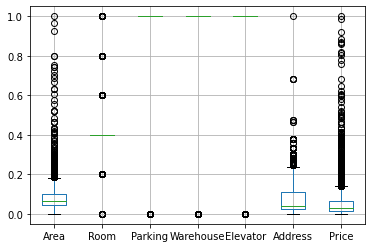

In [47]:
te.boxplot()

In [48]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [49]:
te=remove_outlier(te,'Price')
te=remove_outlier(te,'Address')
te=remove_outlier(te,'Area')
te=remove_outlier(te,'Room')

In [50]:
te.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,0.058719,0.368052,0.800733,0.897718,0.746536,0.033212,0.025428
std,0.028120,0.116854,0.399530,0.303081,0.435083,0.020578,0.018268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000610
25%,0.036707,0.200000,1.000000,1.000000,0.000000,0.016445,0.010944
50%,0.055617,0.400000,1.000000,1.000000,1.000000,0.039222,0.021607
75%,0.077864,0.400000,1.000000,1.000000,1.000000,0.043560,0.035109
max,0.139043,0.600000,1.000000,1.000000,1.000000,0.103197,0.125507


In [51]:
te.groupby('Price').mean()

,Area,Room,Parking,Warehouse,Elevator,Address
Price,,,,,,
0.00061,0.050056,0.4,1.0,1.0,1.0,0.007567
0.001065,0.088988,0.0,1.0,1.0,1.0,0.003922
0.001152,0.021135,0.2,1.0,1.0,0.0,0.023335
0.001747,0.011123,0.0,0.0,0.0,0.0,0.008212
0.002234,0.036707,0.3,0.5,1.0,0.5,0.006804
...,...,...,...,...,...,...
0.10819,0.116796,0.6,1.0,1.0,1.0,0.097233
0.113602,0.133482,0.6,1.0,1.0,1.0,0.049868
0.119013,0.133482,0.6,1.0,1.0,1.0,0.097233


# simple Regression

### Area and Price

In [52]:
from sklearn import linear_model
from sklearn.metrics import r2_score
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = te[msk]
    test = te[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Area']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Area']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score for degree=1 : ',max(list,key=lambda x:x[1]))
#     print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
#     print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
#     print("R2-score: %.2f" % r2_score(test_y , test_y_) )

opted train size and r2score for degree=1 :  [0.9400000000000003, 0.42457844301133174]


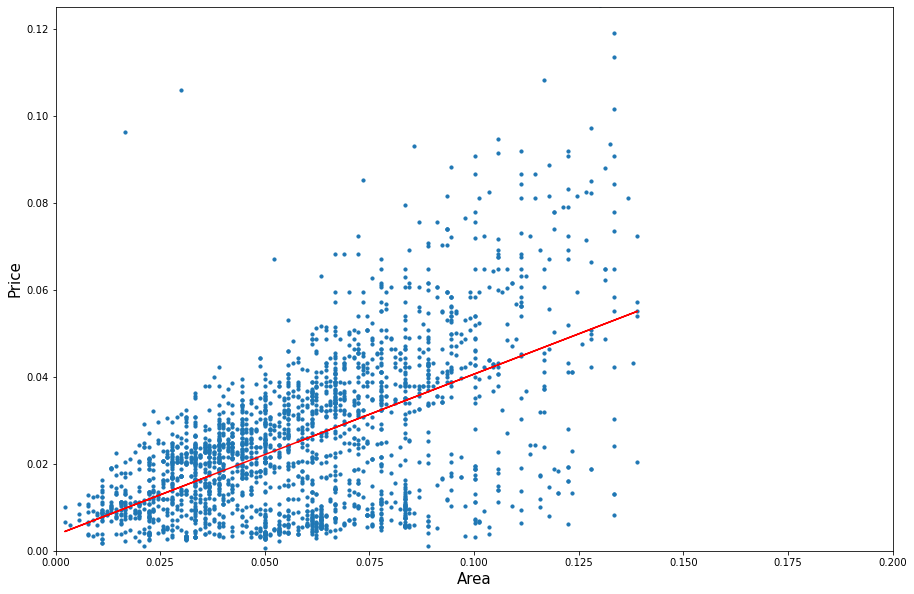

In [53]:
f = plt.figure(figsize=(15,10))
plt.scatter(train.Area, train.Price, s=10)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Area',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xlim([0,0.2])
plt.ylim([0,0.125])
plt.show()

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = te[msk]
    test = te[~msk]
    train_x = np.asanyarray(train[['Area']])
    train_y = np.asanyarray(train[['Price']])

    test_x = np.asanyarray(test[['Area']])
    test_y = np.asanyarray(test[['Price']])


    poly = PolynomialFeatures(degree=2)
    train_x_poly = poly.fit_transform(train_x)
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    test_x_poly = poly.fit_transform(test_x)
    test_y_ = clf.predict(test_x_poly)
    list.append([i,r2_score(test_y , test_y_)])

print('opted train size and r2score for degree=2 : ',max(list,key=lambda x:x[1]))


opted train size and r2score for degree=2 :  [0.9600000000000003, 0.39198504240432175]


### Address and Price

In [55]:
from sklearn import linear_model
from sklearn.metrics import r2_score
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = te[msk]
    test = te[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Address']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Address']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score: for degree=1 ',max(list,key=lambda x:x[1]))
#     print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
#     print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
#     print("R2-score: %.2f" % r2_score(test_y , test_y_) )

opted train size and r2score: for degree=1  [0.62, 0.5626463835123534]


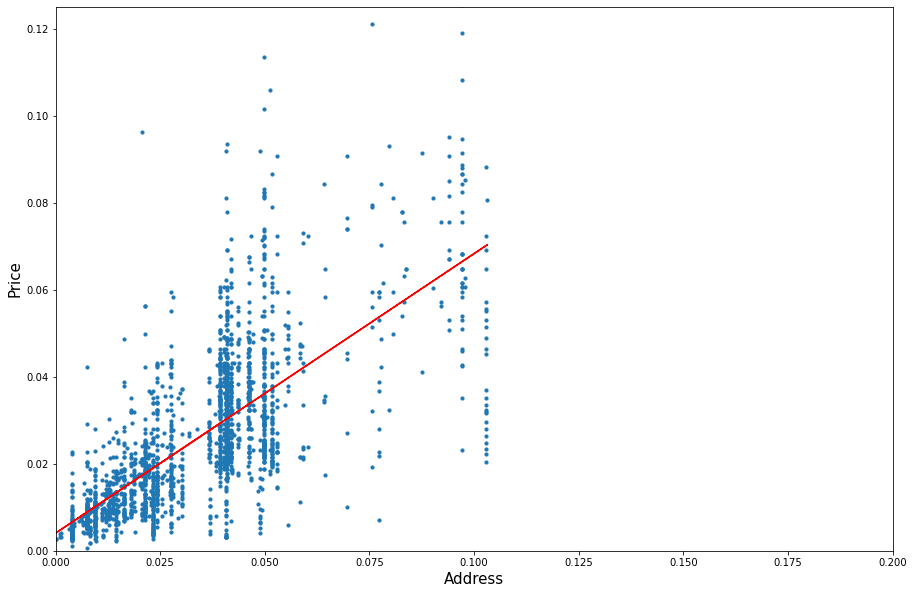

In [56]:
f = plt.figure(figsize=(15,10))
plt.scatter(train.Address, train.Price, s=10)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Address',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xlim([0,0.2])
plt.ylim([0,0.125])
plt.show()

In [57]:
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = te[msk]
    test = te[~msk]
    train_x = np.asanyarray(train[['Address']])
    train_y = np.asanyarray(train[['Price']])

    test_x = np.asanyarray(test[['Address']])
    test_y = np.asanyarray(test[['Price']])


    poly = PolynomialFeatures(degree=2)
    train_x_poly = poly.fit_transform(train_x)
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    test_x_poly = poly.fit_transform(test_x)
    test_y_ = clf.predict(test_x_poly)
    list.append([i,r2_score(test_y , test_y_)])

print('opted train size and r2score for degree=2 : ',max(list,key=lambda x:x[1]))


opted train size and r2score for degree=2 :  [0.9600000000000003, 0.5781607507903799]


# Multiple linear Reg

### Area, Address, Price

In [58]:
cdf = te[['Area','Address','Price']]
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = cdf[msk]
    test = cdf[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Address','Area']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Address','Area']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score: for degree=1 ',max(list,key=lambda x:x[1]))

opted train size and r2score: for degree=1  [0.7600000000000001, 0.7512496817038341]


In [59]:
cdf = te[['Area','Address','Price','Room']]
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = cdf[msk]
    test = cdf[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Address','Area','Room']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Address','Area','Room']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score: for degree=1 ',max(list,key=lambda x:x[1]))

opted train size and r2score: for degree=1  [0.9600000000000003, 0.793058732779045]


In [60]:
cdf = te[['Area','Address','Price','Room','Parking']]
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = cdf[msk]
    test = cdf[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Address','Area','Room','Parking']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Address','Area','Room','Parking']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score: for degree=1 ',max(list,key=lambda x:x[1]))

opted train size and r2score: for degree=1  [0.9600000000000003, 0.7839131619598139]


In [61]:
cdf = te[['Area','Address','Price','Room','Parking','Warehouse']]
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = cdf[msk]
    test = cdf[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Address','Area','Room','Parking','Warehouse']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Address','Area','Room','Parking','Warehouse']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score: for degree=1 ',max(list,key=lambda x:x[1]))

opted train size and r2score: for degree=1  [0.8800000000000002, 0.7647867290197485]


In [62]:
cdf = te[['Area','Address','Price','Room','Parking','Warehouse','Elevator']]

In [63]:
k=np.arange(0.6,0.98,0.02)
list=[]
for i in k:
    msk = np.random.rand(len(te)) < i
    train = cdf[msk]
    test = cdf[~msk]
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[['Address','Area','Room','Parking','Warehouse','Elevator']])
    train_y = np.asanyarray(train[['Price']])
    regr.fit (train_x, train_y)
    # The coefficients
    # print ('Coefficients: ', regr.coef_)
    # print ('Intercept: ',regr.intercept_)
    test_x = np.asanyarray(test[['Address','Area','Room','Parking','Warehouse','Elevator']])
    test_y = np.asanyarray(test[['Price']])
    test_y_ = regr.predict(test_x)
    list.append([i,r2_score(test_y , test_y_)])
print('opted train size and r2score: for degree=1 ',max(list,key=lambda x:x[1]))

opted train size and r2score: for degree=1  [0.6, 0.7367585336623538]


# pycaret test

In [64]:
from pycaret.regression import *

In [65]:
exp_reg = setup(data = te, target = 'Price')
                  

,Description,Value
0,session_id,2633
1,Target,Price
2,Original Data,"(2454, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1717, 6)"


In [66]:
top3 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0046,0.0001,0.0080,0.7974,0.0077,0.2511,0.0380
gbr,Gradient Boosting Regressor,0.0049,0.0001,0.0082,0.7885,0.0078,0.2814,0.0090
rf,Random Forest Regressor,0.0047,0.0001,0.0083,0.7807,0.0080,0.2525,0.0300
xgboost,Extreme Gradient Boosting,0.0047,0.0001,0.0084,0.7765,0.0080,0.2487,0.0180
et,Extra Trees Regressor,0.0049,0.0001,0.0089,0.7472,0.0085,0.2627,0.0280
knn,K Neighbors Regressor,0.0057,0.0001,0.0093,0.7267,0.0089,0.3294,0.0030
lr,Linear Regression,0.0067,0.0001,0.0099,0.6923,0.0095,0.4542,0.1990
lar,Least Angle Regression,0.0067,0.0001,0.0099,0.6923,0.0095,0.4542,0.0020
br,Bayesian Ridge,0.0067,0.0001,0.0099,0.6923,0.0095,0.4545,0.0020
huber,Huber Regressor,0.0066,0.0001,0.0100,0.6881,0.0096,0.4273,0.0040
